<a href="https://colab.research.google.com/github/SriramPrashanth1997/SriramPrashanth1997.github.io/blob/master/BR2208_Assignment_2_Sriram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ford_data = pd.read_csv(r"/content/F.csv")
tesla_data = pd.read_csv(r"/content/TSLA.csv")

In [8]:
ford = ford_data[['Date','Adj Close']]
tesla = tesla_data[['Date','Adj Close']]
new_df = pd.merge(ford, tesla, how="left", on="Date") 

In [9]:
new_df = new_df.rename(columns={"Adj Close_x":"F Adj Close","Adj Close_y":'TSLA Adj Close'})
tsla_ln = new_df['TSLA Adj Close'].pct_change().apply(lambda x: np.log(1+x))
f_ln = new_df['F Adj Close'].pct_change().apply(lambda x: np.log(1+x))
var_tesla = tsla_ln.var()
var_ford = f_ln.var()

In [12]:
test1 = new_df[['F Adj Close','TSLA Adj Close']]
test2 = test1.pct_change().apply(lambda x: np.log(1+x))
cov_matrix = test1.pct_change().apply(lambda x: np.log(1+x)).cov()

In [13]:
ann_sd = test1.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(52))
ind_er = test2.mean()
ind_er
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = 2
num_portfolios = 53
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(52) # Annual standard deviation = volatility
    p_vol.append(ann_sd)


In [14]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(test1.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.head()


,Returns,Volatility,F Adj Close weight,TSLA Adj Close weight
0,0.006817,0.396809,0.550102,0.449898
1,0.006738,0.399940,0.500039,0.499961
2,0.006048,0.497221,0.062843,0.937157
3,0.006673,0.403896,0.459151,0.540849
4,0.005981,0.511687,0.020782,0.979218


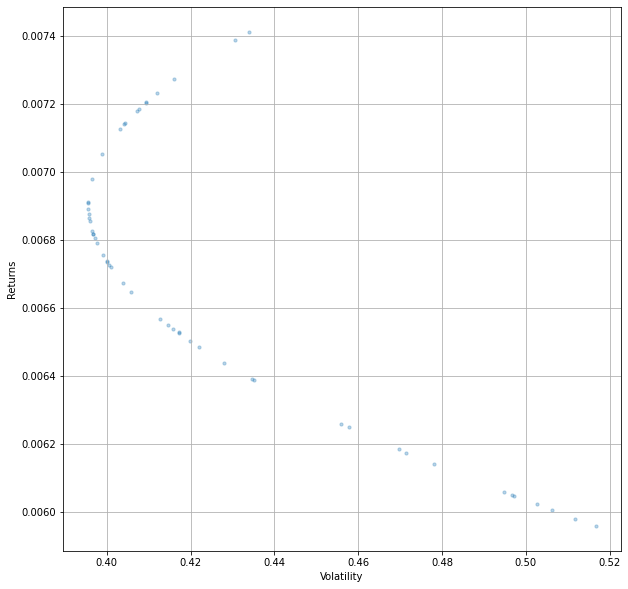

In [15]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [16]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                  0.006909
Volatility               0.395595
F Adj Close weight       0.608540
TSLA Adj Close weight    0.391460
Name: 18, dtype: float64

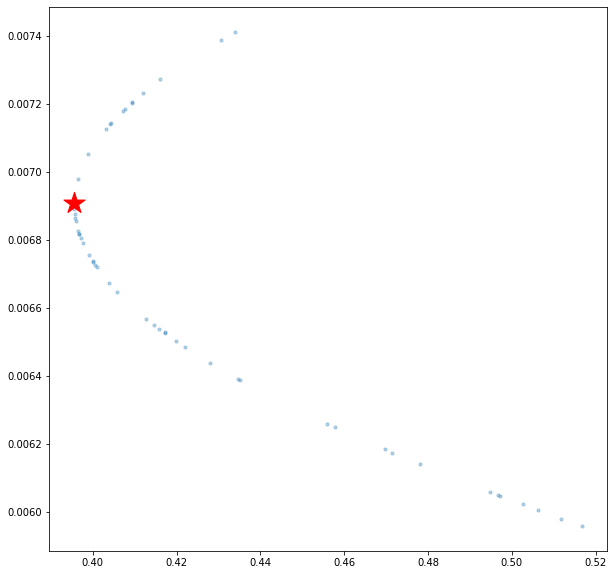

In [17]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [18]:
test2['TSLA Adj Close'].cov(test2['F Adj Close'])
test2['TSLA Adj Close'].corr(test2['F Adj Close'])


0.3542360511460083

In [19]:
import numpy as np
np.random.seed(42)
num_ports = 54
all_weights = np.zeros((num_ports,2))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(2))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (test2.mean() * weights * 52))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(test2.cov()*52, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

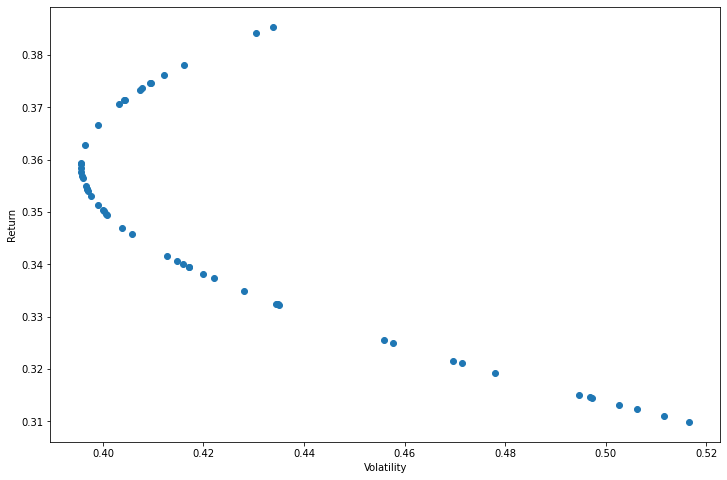

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr)

plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [21]:
print('Min Vol:{}'.format(vol_arr.max()))

Min Vol:0.5166655100798256


In [22]:
print('Max Sharpe:{}'.format(sharpe_arr.max()))
print('Location:{}'.format(sharpe_arr.argmax()))

Max Sharpe:0.9191894583470882
Location:31


In [23]:
print(all_weights[24,:])
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

[0.74731634 0.25268366]


In [24]:
max_sr_vol

0.3989383987563954

In [25]:
max_sr_ret

0.3666999706667458

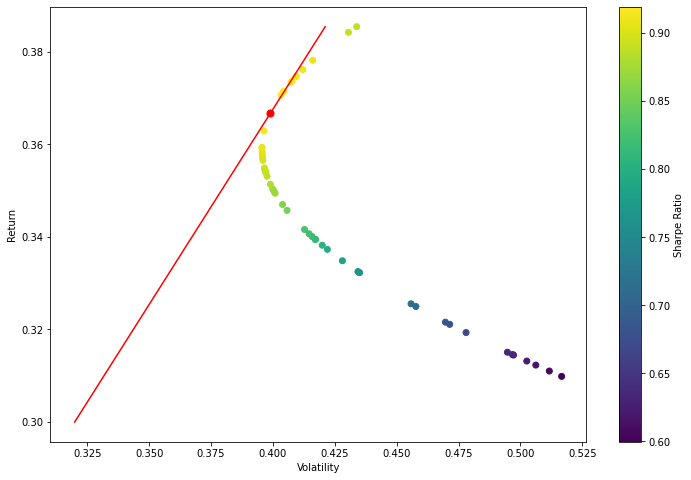

In [26]:
import matplotlib.pyplot as plt
cal_x = []
cal_y = []
utility = []
A = 4
RF = 0.03
for er in np.linspace(0.3, max(ret_arr), 20):
    sd = (er - RF)/((max_sr_ret -RF)/max_sr_vol)
    u = er - 0.005*A*(sd**2)
    cal_x.append(sd)
    cal_y.append(er)
    utility.append(u)
data2 = {'utility':utility, 'cal_y':cal_y, 'cal_x':cal_x}
cal = pd.DataFrame(data2)
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50)
# red dot
plt.plot(cal_x, cal_y, color='r')
plt.show()